<a href="https://colab.research.google.com/github/bs3537/DS-Unit-4-Sprint-1-NLP/blob/master/bhav_sprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [0]:
import pandas as pd

yelp = pd.read_json('review_sample.json', lines=True)

In [0]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [0]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [0]:
def tokenize(doc):
    
    return [token.text for token in nlp(doc) if not token.is_stop and not token.is_punct and not token.pos == 'PRON']

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [0]:
data = yelp['text'].apply(tokenize)

In [0]:
data

0       [BEWARE, FAKE, FAKE, FAKE, small, business, Lo...
1       [Came, lunch, Togo, Service, quick, Staff, fri...
2       [Vegas, dozens, times, stepped, foot, Circus, ...
3       [went, night, closed, street, party, best, act...
4       [3.5, 4, stars, \n\n, bad, price, $, 12.99, lu...
5       [Tasty, fast, casual, Latin, street, food,  , ...
6       [absolutely, amazing, incredible, production, ...
7       [Came, Pho, enjoyed,  , got, 9:00pm, busy, got...
8       [Absolutely, Unique, experience, nail, shop, f...
9       [Wow, walked, sat, bar, 10, minutes, bartender...
10      [popped, dinner, yesterday, reservation, despi...
11      [Thw, worst, stay, ended, paying, 700, 800, 2,...
12      [Great, friendly, customer, service, quality, ...
13      [food, great,  , super, busy, server, attentiv...
14      [Talk, getting, ripped, charged, $, 420, shut,...
15      [Girls, night, tonight, kid, decided, drive, h...
16      [Stopped, drinks, flying, Charlotte, weeks, ba...
17      [excel

In [0]:
vect = [nlp(doc).vector for doc in yelp['text']]

In [0]:
from sklearn.neighbors import NearestNeighbors

In [0]:
nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
nn.fit(vect)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [0]:
fake_review = "I loved the restaurant. The ambience was great and the it was the best Mexican restaurant I have been to."

In [0]:
fake = nlp(fake_review).vector

In [0]:
ten_similar_reviews = nn.kneighbors([fake])[1]

In [0]:
for review in ten_similar_reviews:
    print(yelp['text'].iloc[review])

922     Came here twice as it was right beside the hot...
281     This was the coolest restaurant I've ever been...
970     This really has become one of the best restaur...
6419    We have been here a couple of times for my wif...
1081    It was hard giving Moji a less than 5 star rev...
5110    Food was excellent. The music choice inside wa...
4139    I was so excited this was opening up in Las Ve...
6477    I had lived in Vegas for half of my life but n...
6339    I was in the area for work and was craving Mex...
5788    I have been here over the years and have enjoy...
Name: text, dtype: object


## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
# Create Pipeline Components

vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))#starting with bigrams
rfc = RandomForestClassifier()

In [0]:
# Define the Pipeline
pipe = Pipeline([
    ('vect', vect),      # TF-IDF Vectorizer
    ('clf', rfc)         # RandomForest Classifier
])

In [0]:
X = yelp['text']
y = yelp['stars']

In [0]:
parameters = {
    'vect__max_df': ( 0.75, 1.0),
    'vect__min_df': (.02, .05),
    'vect__max_features': (500,5000),#max features setting limit can leave words out
    'clf__n_estimators': (25, 200),
    'clf__max_depth': (15, 20)
}

grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X, y)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  3.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                        no

In [0]:
grid_search.best_params_

{'clf__max_depth': 20,
 'clf__n_estimators': 200,
 'vect__max_df': 1.0,
 'vect__max_features': 5000,
 'vect__min_df': 0.02}

In [0]:
dict = {'text': ["I loved the restaurant. The ambience was great and the it was the best Mexican restaurant I have been to."]}

In [0]:
X_test = pd.DataFrame(data = dict)

In [0]:
X_test.head()

,text
0,I loved the restaurant. The ambience was great...


In [0]:
y_test = grid_search.predict(X_test)

In [0]:
y_test

array([5], dtype=int64)

In [0]:
#Thus, the trained model is predicting the above fake review as having 5 stars. 

In [0]:
#Another way to find predictions
grid_search.predict(tokenize("The food was good and I liked it."))

array([5, 5, 5], dtype=int64)

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [0]:
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary

C:\Users\bhavn\Anaconda3\envs\U4-S1-NLP\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [0]:
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS
from gensim.utils import simple_preprocess
import warnings
warnings.filterwarnings('ignore')

Learn the vocubalary of the yelp data:

In [0]:
id2word = corpora.Dictionary(data)

Create a bag of words representation of the entire corpus

In [0]:
corpus = [id2word.doc2bow(token) for token in data]

Your LDA model should be ready for estimation: 

In [0]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=4,
                   num_topics = 10 # You can change this parameter
                  )

Create 1-2 visualizations of the results

In [0]:
lda.print_topics()

[(0,
  '0.036*" " + 0.013*"\n\n" + 0.011*"place" + 0.010*"good" + 0.009*"great" + 0.007*"like" + 0.006*"food" + 0.006*"time" + 0.005*"$" + 0.005*"service"'),
 (1,
  '0.021*" " + 0.015*"\n\n" + 0.008*"place" + 0.008*"food" + 0.007*"good" + 0.006*"service" + 0.006*"\n" + 0.006*"like" + 0.005*"great" + 0.004*"$"'),
 (2,
  '0.021*" " + 0.019*"\n\n" + 0.009*"place" + 0.007*"food" + 0.006*"time" + 0.006*"service" + 0.006*"good" + 0.006*"like" + 0.005*"\n" + 0.004*"great"'),
 (3,
  '0.035*" " + 0.019*"\n\n" + 0.010*"food" + 0.008*"great" + 0.008*"time" + 0.007*"good" + 0.007*"place" + 0.007*"service" + 0.005*"like" + 0.005*"got"'),
 (4,
  '0.021*" " + 0.012*"\n\n" + 0.010*"food" + 0.007*"like" + 0.007*"place" + 0.006*"time" + 0.006*"good" + 0.005*"\n" + 0.005*"great" + 0.005*"service"'),
 (5,
  '0.021*" " + 0.013*"\n\n" + 0.010*"food" + 0.009*"place" + 0.008*"service" + 0.007*"great" + 0.006*"good" + 0.006*"\n" + 0.006*"time" + 0.006*"like"'),
 (6,
  '0.026*" " + 0.018*"\n\n" + 0.009*"good" +

In [0]:
import re
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [0]:
topics = [' '.join(t[0:10]) for t in words]

In [0]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
  

 place good great like food time $ service

------ Topic 1 ------
  

 place food good service 
 like great $

------ Topic 2 ------
  

 place food time service good like 
 great

------ Topic 3 ------
  

 food great time good place service like got

------ Topic 4 ------
  

 food like place time good 
 great service

------ Topic 5 ------
  

 food place service great good 
 time like

------ Topic 6 ------
  

 good place food great 
 time $ like

------ Topic 7 ------
  

 
 good like food great time place service

------ Topic 8 ------
  

 place good food time like service 
 great

------ Topic 9 ------
  

 place food good 
 time service great like



In [0]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [0]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.004277  0.000363       1        1  10.917492
7     -0.002904  0.003628       2        1  10.836528
0     -0.004527 -0.004531       3        1  10.288069
5      0.003493 -0.001630       4        1  10.161896
6     -0.000666 -0.000064       5        1  10.136160
9     -0.000375  0.000705       6        1   9.992526
8      0.002067  0.002038       7        1   9.622650
2      0.003100 -0.002036       8        1   9.570668
1      0.002801 -0.001576       9        1   9.307689
4      0.001290  0.003104      10        1   9.166323, topic_info=     Category          Freq        Term         Total  loglift  logprob
0     Default  13617.000000              13617.000000  30.0000  30.0000
358   Default   3014.000000          \n   3014.000000  29.0000  29.0000
57    Default   8043.000000        \n\n   8043.000000  28.0000  28.0000
140   Default   4423.000000       place   4423.000000  27.0000  27.0000
158   Default   4313.000000        food   4313.000000  26.0000  26.0000
52    Default   4101.000000        good   4101.000000  25.0000  25.0000
227   Default   3325.000000       great   3325.000000  24.0000  24.0000
350   Default   3007.000000     service   3007.000000  23.0000  23.0000
1     Default   2135.000000           $   2135.000000  22.0000  22.0000
170   Default    810.000000       price    810.000000  21.0000  21.0000
104   Default   1525.000000        nice   1525.000000  20.0000  20.0000
26    Default   3204.000000        like   3204.000000  19.0000  19.0000
388   Default   1084.000000   delicious   1084.000000  18.0000  18.0000
1413  Default   1129.000000     chicken   1129.000000  17.0000  17.0000
390   Default    640.000000      dinner    640.000000  16.0000  16.0000
41    Default   3230.000000        time   3230.000000  15.0000  15.0000
331   Default   1287.000000         try   1287.000000  14.0000  14.0000
199   Default   1087.000000   recommend   1087.000000  13.0000  13.0000
130   Default   1466.000000        best   1466.000000  12.0000  12.0000
493   Default    727.000000    customer    727.000000  11.0000  11.0000
149   Default    742.000000         bad    742.000000  10.0000  10.0000
375   Default   1284.000000        came   1284.000000   9.0000   9.0000
177   Default    827.000000       think    827.000000   8.0000   8.0000
1450  Default    607.000000       happy    607.000000   7.0000   7.0000
906   Default    847.000000           3    847.000000   6.0000   6.0000
138   Default   1304.000000      people   1304.000000   5.0000   5.0000
415   Default   1402.000000       order   1402.000000   4.0000   4.0000
51    Default   1236.000000    friendly   1236.000000   3.0000   3.0000
645   Default    619.000000       found    619.000000   2.0000   2.0000
1420  Default    746.000000         lot    746.000000   1.0000   1.0000
...       ...           ...         ...           ...      ...      ...
380   Topic10    149.199432        come   1329.629395   0.2023  -5.7685
1     Topic10    226.424316           $   2135.197754   0.1457  -5.3513
717   Topic10     41.927345      tables    322.303375   0.3501  -7.0378
169   Topic10    109.350067      pretty    950.587158   0.2271  -6.0792
224   Topic10     51.725220         fun    410.657898   0.3178  -6.8278
387   Topic10    128.555542  definitely   1149.142822   0.1992  -5.9174
375   Topic10    140.700638        came   1284.468384   0.1782  -5.8271
176   Topic10     67.665718       stars    564.236328   0.2687  -6.5592
41    Topic10    308.214020        time   3230.777344   0.0400  -5.0430
0     Topic10   1024.047852              13617.553711  -0.1980  -3.8422
37    Topic10    123.529266        said   1139.790283   0.1675  -5.9573
1413  Topic10    122.479881     chicken   1129.446899   0.1681  -5.9658
199   Topic10    117.409630   recommend   1087.895752   0.1633  -6.0081
138   Topic10    134.089844      people   1304.477905   0.1146  -5.87

In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [0]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        print(f'PASS #{iter_}')
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })
            print(f'Evaluating Topic Model with {num_topics} topics...')

    return coherence_values

In [0]:
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus,
                                                        start=5, 
                                                        limit=30, 
                                                        step=3,
                                                        passes=10)

PASS #0
Evaluating Topic Model with 5 topics...
Evaluating Topic Model with 8 topics...
Evaluating Topic Model with 11 topics...
Evaluating Topic Model with 14 topics...
Evaluating Topic Model with 17 topics...
Evaluating Topic Model with 20 topics...
Evaluating Topic Model with 23 topics...
Evaluating Topic Model with 26 topics...
Evaluating Topic Model with 29 topics...
PASS #1
Evaluating Topic Model with 5 topics...
Evaluating Topic Model with 8 topics...
Evaluating Topic Model with 11 topics...
Evaluating Topic Model with 14 topics...
Evaluating Topic Model with 17 topics...
Evaluating Topic Model with 20 topics...
Evaluating Topic Model with 23 topics...
Evaluating Topic Model with 26 topics...
Evaluating Topic Model with 29 topics...
PASS #2
Evaluating Topic Model with 5 topics...
Evaluating Topic Model with 8 topics...
Evaluating Topic Model with 11 topics...
Evaluating Topic Model with 14 topics...
Evaluating Topic Model with 17 topics...
Evaluating Topic Model with 20 topics..

In [0]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

In [0]:
topic_coherence.head()

,coherence_score,num_topics,pass
0,-1.787058,5,0
1,-1.811184,8,0
2,-1.827925,11,0
3,-1.804672,14,0
4,-1.801499,17,0


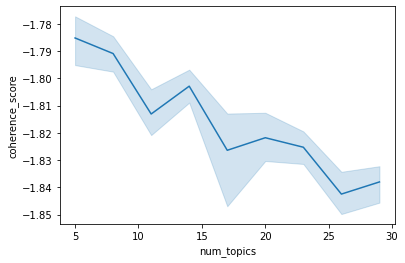

In [0]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

In [0]:
lda[id2word.doc2bow(tokenize("I loved the restaurant. The ambience was great and the it was the best Mexican restaurant I have been to."))]

[(0, 0.0125563145),
 (1, 0.023606598),
 (2, 0.02261382),
 (3, 0.026818864),
 (4, 0.06733654),
 (5, 0.17435147),
 (6, 0.18756258),
 (7, 0.07981823),
 (8, 0.19281967),
 (9, 0.2125159)]

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)